# Optimización de la Ubicación de Pozos Petroleros mediante Análisis Predictivo y Bootstrapping

OilyGiant, una empresa líder en la industria de extracción de petróleo, está buscando expandir sus operaciones abriendo 200 pozos nuevos en tres regiones diferentes. El objetivo es maximizar el margen de beneficio seleccionando las ubicaciones más prometedoras para la extracción de petróleo. Para lograr esto, se utilizará un enfoque de análisis predictivo y la técnica de bootstrapping para evaluar tanto los beneficios como los riesgos potenciales asociados con cada región.

## Descripción del proyecto
En este proyecto, se utilizarán datos recopilados sobre muestras de crudo y los parámetros de cada pozo petrolero en tres regiones distintas. Se creará un modelo predictivo que permitirá identificar las ubicaciones con el mayor potencial de producción de petróleo. Este modelo se entrenará utilizando técnicas de aprendizaje automático y se evaluará utilizando validación cruzada para garantizar su robustez y precisión.

Además, se llevará a cabo un análisis de bootstrapping para estimar los beneficios y riesgos potenciales asociados con cada región. Esta técnica permitirá simular múltiples escenarios posibles y calcular intervalos de confianza para los rendimientos financieros esperados. 

## Objetivos del Proyecto:

* Desarrollar un modelo predictivo para identificar las ubicaciones óptimas de los pozos petroleros en tres regiones diferentes.
* Realizar un análisis de bootstrapping para evaluar los beneficios y riesgos potenciales asociados con cada región.
* Recomendar a OilyGiant la selección de la región con el mayor margen de beneficio para la apertura de los 200 pozos nuevos de petróleo.

## Preparación de datos
### Librerías

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import bootstrap


### Descarga de los dataset

In [119]:
df_0 = pd.read_csv('geo_data_0.csv')
df_1 = pd.read_csv('geo_data_1.csv')
df_2 = pd.read_csv('geo_data_2.csv')

## Descripción de los datos

* id — identificador único de pozo de petróleo
* f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
* product — volumen de reservas en el pozo de petróleo (miles de barriles).

#### Dataset 0

In [120]:
display (df_0)
print (df_0.info())
print (df_0.describe())


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.3437

#### Dataset 1

In [121]:
display (df_1)
print (df_1.info())
print (df_1.describe())


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.7340

#### Dataset 2

In [122]:
display (df_2)
print (df_2.info())
print (df_2.describe())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.8448

## Corrección de datos

En el proceso de preparación de los datos para nuestro análisis, se tomó la decisión de eliminar la columna "id" de nuestro conjunto de datos. Esta columna representa el identificador único de cada pozo de petróleo. La razón detrás de esta eliminación radica en que, para el análisis que estamos llevando a cabo, el identificador único no aporta información valiosa ni contribuye significativamente a nuestros objetivos.

In [123]:
df_0 = df_0.drop('id', axis= 1)
df_1 = df_1.drop('id', axis= 1)
df_2 = df_2.drop('id', axis= 1)

In [124]:
def limpiar_datos(dataset, metodo_valores_ausentes='eliminar'):
    """
    Limpia un dataset dado.
    
    Parámetros:
        - dataset: DataFrame de Pandas.
        - metodo_valores_ausentes: Método a utilizar para manejar los valores ausentes.
                                    Opciones: 'eliminar' (por defecto), 'rellenar'.
    Retorna:
        - DataFrame limpio.
    """
    # Eliminar duplicados
    dataset = dataset.drop_duplicates()
    
    # Manejar valores ausentes
    if metodo_valores_ausentes == 'eliminar':
        dataset = dataset.dropna()
    elif metodo_valores_ausentes == 'rellenar':
        dataset = dataset.fillna(dataset.mean())  # Rellena con el valor medio de cada columna
    else:
        raise ValueError("El método de manejo de valores ausentes especificado no es válido. Utiliza 'eliminar' o 'rellenar'.")
    
    return dataset



In [125]:
df_0 = limpiar_datos(df_0, metodo_valores_ausentes='rellenar')

df_1 = limpiar_datos(df_1, metodo_valores_ausentes='rellenar')

df_2 = limpiar_datos(df_2, metodo_valores_ausentes='rellenar')


## Visualización de datos

In [126]:
def graficar_dataset(dataset, titulo):
    """
    Grafica un dataset y muestra diagramas de caja para cada columna.
    
    Parámetros:
        - dataset: DataFrame de Pandas.
        - titulo: Título del gráfico.
    """
    # Crear subplots para cada columna
    fig, axs = plt.subplots(nrows=1, ncols=dataset.shape[1], figsize=(15, 5))
    
    # Graficar diagramas de caja para cada columna
    for i, col in enumerate(dataset.columns):
        sns.boxplot(y=dataset[col], ax=axs[i])
        axs[i].set_title(col)
    
    # Ajustar el espacio entre los subplots
    plt.tight_layout()
    
    # Añadir título al gráfico
    plt.suptitle(titulo, fontsize=16)
    
    # Mostrar la gráfica
    plt.show()


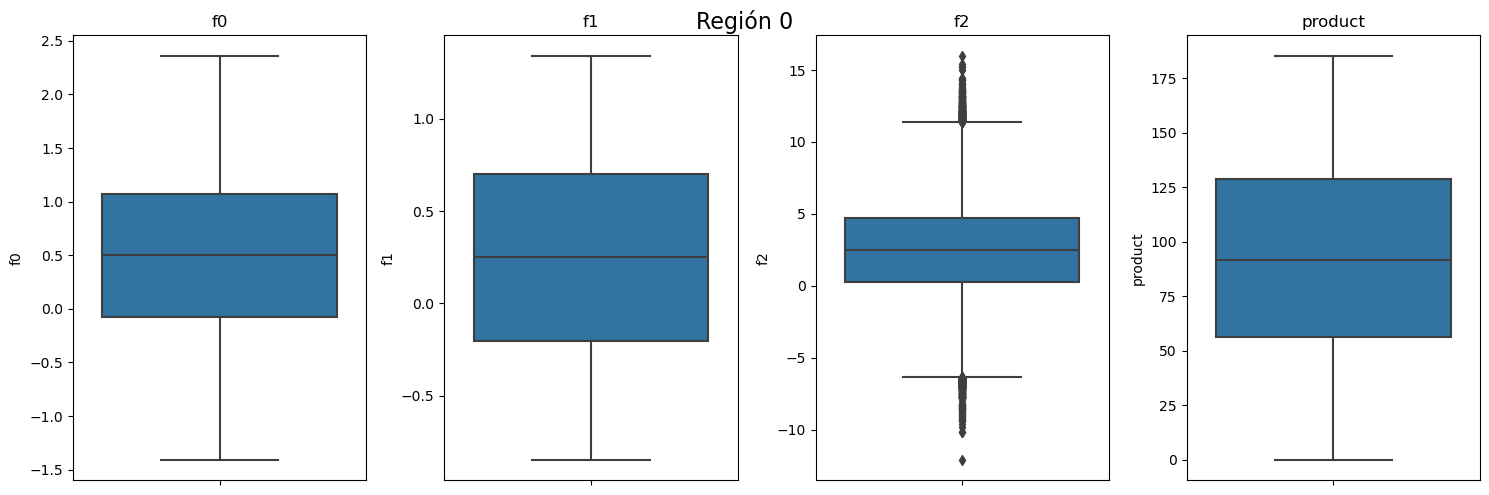

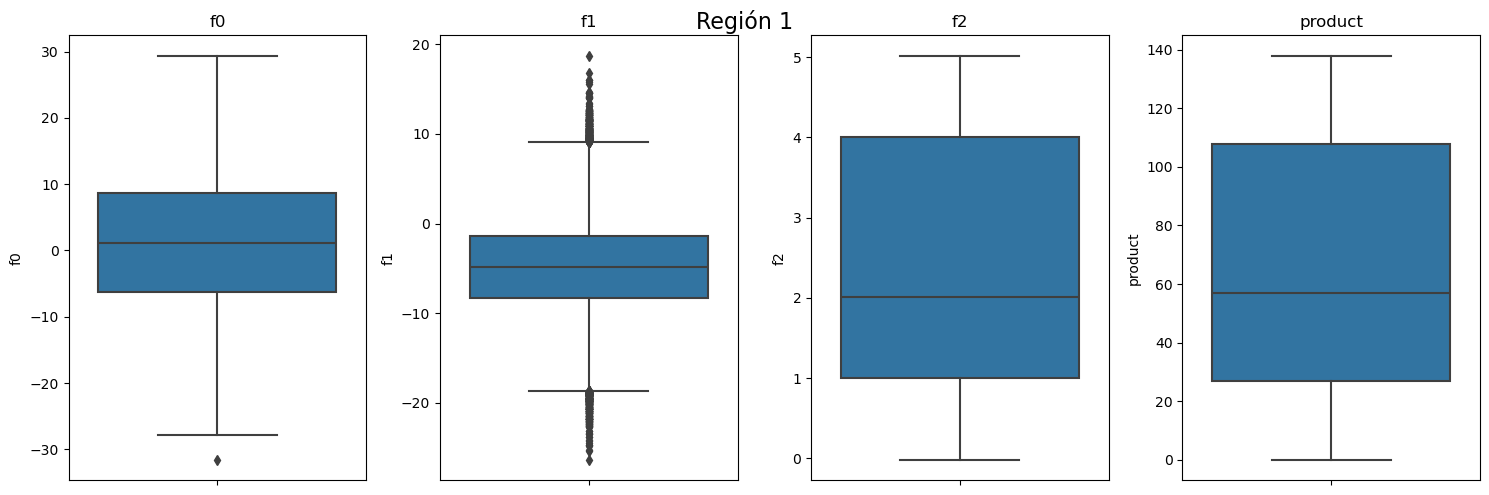

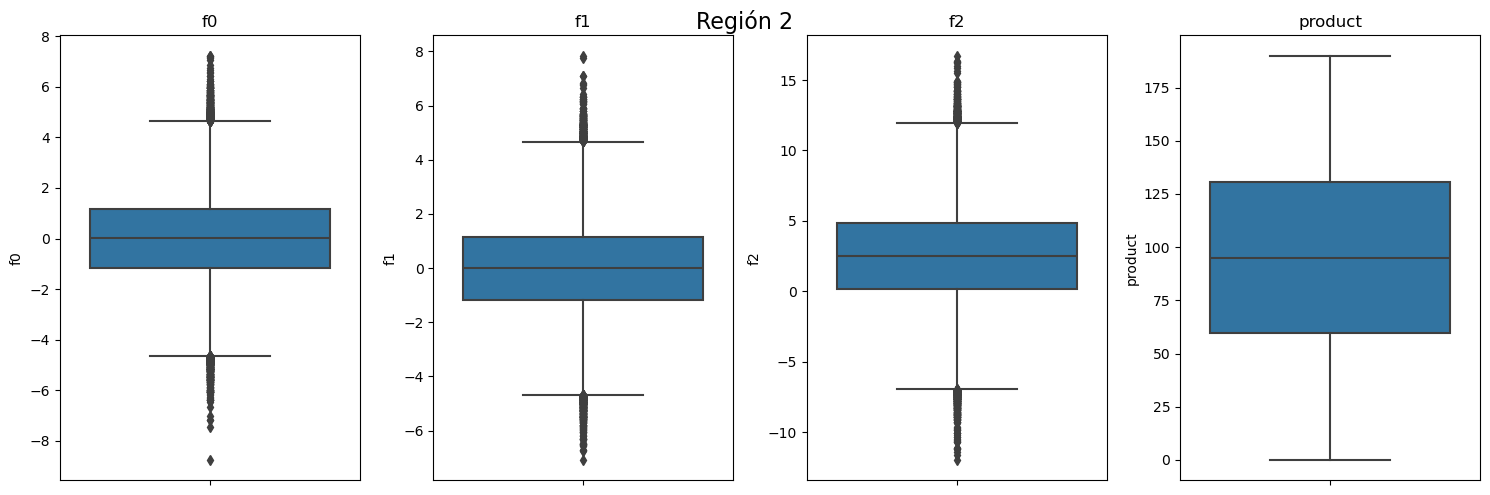

In [127]:
# Graficar cada dataset por separado
graficar_dataset(df_0, "Región 0")
graficar_dataset(df_1, "Región 1")
graficar_dataset(df_2, "Región 2")


## División de conjunto de datos
Para la creación de nuestro modelo de aprendizaje automático, inicialmente dividiremos nuestros datos en un conjunto de entrenamiento y un conjunto de validación, utilizando una proporción de 75:25, respectivamente. Esta división nos permitirá entrenar nuestro modelo en una parte de los datos y luego evaluar su desempeño en otra parte independiente.

In [128]:
#divide datos
def split_data (df):
    features = df.drop('product', axis= 1)
    target = df['product']

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

## Modelo de aprendizaje automático
El objetivo de nuestro modelo será predecir el volumen de reservas en pozos nuevos, utilizando la variable objetivo 'product'. Este enfoque nos permitirá construir un modelo que pueda generalizar y hacer predicciones precisas sobre el volumen de reservas en función de las características proporcionadas en nuestro conjunto de datos.

Al establecer 'product' como nuestra variable objetivo, nuestro modelo buscará identificar patrones y relaciones entre las características de los pozos (representadas por las variables f0, f1 y f2) y el volumen de reservas. Esta capacidad predictiva será fundamental para optimizar la exploración y explotación de nuevos pozos de petróleo.

In [129]:
#entrena modelo 
def model(features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train) #entrena el modelo en el conjunto de entrenamiento
    predictions_train = model.predict(features_train) #obtener las predicciones del modelo en el conjunto de validación
    predictions_valid = model.predict(features_valid) #obtener las predicciones del modelo en el conjunto de validación

    return predictions_train, predictions_valid

## Métrica de evaluación
Para evaluar la precisión de nuestro modelo de aprendizaje automático, utilizaremos la métrica conocida como Error Cuadrático Medio de la Raíz (RMSE, por sus siglas en inglés). Esta métrica nos proporciona una medida de cuán cerca están las predicciones del modelo de los valores reales. 
Además, para entender mejor el rendimiento del modelo, también calcularemos el volumen medio de reservas predicho. 

Al evaluar tanto el RMSE como el Volumen medio de reservas predicho, obtendremos una imagen completa del desempeño y la fiabilidad de nuestro modelo en la predicción del volumen de reservas en pozos nuevos.

In [144]:
#rmse y volumen medio
def rmse (target_train, predictions_train, target_valid, predictions_valid):
    result_train = mean_squared_error(target_train, predictions_train, squared = False) #calculo de RECM en conjunto entrenamiento
    result_valid = mean_squared_error(target_valid, predictions_valid, squared = False) #calculo de RECM en conjunto validación
    print ('RMSE del modelo en conjunto de entrenamiento: ' , result_train)
    print ('Volumen medio de reservas predicho (entrenamiento): ', predictions_train.mean())
    print ('\nRMSE del modelo en conjunto de validación: ' , result_valid)
    print ('Volumen medio de reservas predicho (validación): ', predictions_valid.mean())
    print ()

## Evaluación de cada región 
Para garantizar la generalización y la aplicabilidad de nuestro modelo predictivo en diversas condiciones geográficas, procederemos a evaluar su desempeño en cada región de interés. Esto significa que, en lugar de evaluar el modelo en el conjunto de datos en su totalidad, realizaremos evaluaciones específicas para cada región geográfica relevante en nuestra área de estudio.

La razón detrás de esta estrategia radica en las posibles variaciones y particularidades que pueden existir entre diferentes regiones. Factores como la geología, la topografía, y las condiciones operativas pueden influir en la relación entre las características de los pozos y el volumen de reservas. Por lo tanto, evaluaremos el modelo en cada región para asegurarnos de que sea capaz de capturar y generalizar estas variaciones de manera efectiva.



### Región 0

In [150]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_data(df_0)
predictions_0_t, predictions_0_v = model(features_train_0,target_train_0, features_valid_0)
rmse(target_train_0, predictions_0_t, target_valid_0, predictions_0_v)

RMSE del modelo en conjunto de entrenamiento:  37.72999219904026
Volumen medio de reservas predicho (entrenamiento):  92.64046775305694

RMSE del modelo en conjunto de validación:  37.5794217150813
Volumen medio de reservas predicho (validación):  92.59256778438035



RMSE: Los valores de RMSE tanto en el conjunto de entrenamiento como en el de validación son similares, lo que sugiere que el modelo tiene una capacidad de generalización adecuada y no está sobreajustado a los datos de entrenamiento. Un RMSE de alrededor de 37.7 indica que, en promedio, las predicciones del modelo tienen un error absoluto de aproximadamente 37.7 miles de barriles respecto a los valores reales.

Volumen Medio de Reservas Predicho: El volumen medio de reservas predicho tanto en el conjunto de entrenamiento como en el de validación es aproximadamente 92.6 miles de barriles. Esto indica que, en promedio, el modelo tiende a predecir un volumen de reservas similar en ambas etapas, lo que sugiere consistencia en las predicciones.

### Región 1

In [151]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(df_1)
predictions_1_t, predictions_1_v = model(features_train_1,target_train_1, features_valid_1)
rmse(target_train_1, predictions_1_t, target_valid_1, predictions_1_v)

RMSE del modelo en conjunto de entrenamiento:  0.8894720773917385
Volumen medio de reservas predicho (entrenamiento):  68.85895465854666

RMSE del modelo en conjunto de validación:  0.893099286775617
Volumen medio de reservas predicho (validación):  68.72854689544602



RMSE: Los valores de RMSE tanto en el conjunto de entrenamiento como en el de validación son muy bajos, lo que indica que el modelo tiene una capacidad de generalización excelente y está bien ajustado a los datos.

Volumen Medio de Reservas Predicho: El volumen medio de reservas predicho es similar en el conjunto de entrenamiento y en el de validación, indicando que el modelo es consistente en ambas etapas.


### Región 2

In [152]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(df_2)
predictions_2_t, predictions_2_v = model(features_train_2,target_train_2, features_valid_2)
rmse(target_train_2, predictions_2_t, target_valid_2, predictions_2_v)

RMSE del modelo en conjunto de entrenamiento:  40.06425978832384
Volumen medio de reservas predicho (entrenamiento):  95.03858906371522

RMSE del modelo en conjunto de validación:  40.02970873393434
Volumen medio de reservas predicho (validación):  94.96504596800489



RMSE: La métrica RMSE es bastante similar en ambos conjuntos de datos de entrenamiento y validación, lo que sugiere que el modelo tiene un rendimiento consistente en ambos conjuntos. 

Volumen Medio de Reservas Predicho:: El valor medio de las reservas predichas también es bastante cercano en ambos conjuntos, lo que indica que el modelo está generalizando bien y no está sobreajustando los datos de entrenamiento.

## Cálculo de ganancias 

Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades).

Se elegirán los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones. Después se calculará la ganancia de dichos 200 pozos de cada región y se elegirá cuál región es la ideal para invertir en el desarrollo de pozos petrolíferos.



In [134]:
def ganancia (df, columna):
    revenue = 4500 #ingreso (ganancia) de una unidad de producto
    df['revenue'] = df[columna] * revenue
    return df

### Región 0

In [135]:
region_0 = features_valid_0
region_0.loc[:, "predictions"] = predictions_0_v
#display (region_0)

#top 200 pozos con los valores de predicción mas altos
top_region_0 = region_0.sort_values(by= 'predictions', ascending=False).head(200)
top_region_0 = ganancia(top_region_0, 'predictions')
display (top_region_0)

,f0,f1,f2,predictions,revenue
93073,1.814871,-0.207268,14.087536,180.180713,810813.208776
46784,1.853784,-0.153503,13.585450,176.252213,793134.959252
78948,1.412823,-0.612153,12.784117,175.850623,791327.804775
43388,1.958217,0.239926,14.279737,175.658429,790462.930300
6496,0.370519,-0.283066,13.668868,173.299686,779848.587829
...,...,...,...,...,...
30488,0.181807,-0.182453,10.226489,148.507064,668281.787372
98799,0.527002,-0.292326,9.799607,148.481767,668167.950072
53840,0.210104,-0.073084,10.440292,148.476498,668144.241721
4638,1.887199,-0.249347,9.143470,148.436761,667965.426709


### Región 1

In [136]:
region_1 = features_valid_1
region_1.loc[:, "predictions"] = predictions_1_v
#display (region_1)

#top 200 pozos con los valores de predicción mas altos
top_region_1 = region_1.sort_values(by= 'predictions', ascending=False).head(200)
top_region_1 = ganancia(top_region_1, 'predictions')
display (top_region_1)

,f0,f1,f2,predictions,revenue
38665,-19.348001,-14.265995,5.010731,139.818970,629185.364156
20191,-23.795133,-2.313652,4.994894,139.773423,628980.403308
14041,-20.401677,-11.205156,5.003276,139.703330,628664.986409
24274,-19.015453,-13.129388,5.003874,139.560938,628024.219177
92782,-18.857226,-14.873464,5.001661,139.516754,627825.394320
...,...,...,...,...,...
13370,-11.747581,-14.103898,4.999883,138.421423,622896.404035
45823,-13.212191,-0.488686,5.002969,138.416960,622876.320892
86987,-12.583884,-7.298514,5.000668,138.413881,622862.463171
72313,-11.702996,-8.072318,5.004734,138.412834,622857.752128


### Región 2

In [137]:
region_2 = features_valid_2
region_2.loc[:, "predictions"] = predictions_2_v
#display (region_2)

#top 200 pozos con los valores de predicción mas altos
top_region_2 = region_2.sort_values(by= 'predictions', ascending=False).head(200)
top_region_2 = ganancia(top_region_2, 'predictions')
display (top_region_2)

,f0,f1,f2,predictions,revenue
98619,0.538994,2.549631,14.919819,165.856833,746355.749285
46649,0.155658,-0.094626,14.871466,165.679685,745558.583697
82661,-0.327136,1.905071,14.496406,163.439962,735479.830494
53151,1.058083,2.404479,14.251280,162.062589,729281.652747
18747,0.529011,0.184251,14.191419,161.797476,728088.643267
...,...,...,...,...,...
66244,0.522773,2.337429,10.825174,142.490763,641208.432752
34285,-2.302883,1.867561,10.836192,142.485922,641186.650401
36778,1.712211,-4.706505,10.762678,142.465777,641095.997523
7806,-0.194327,-1.024366,10.798092,142.454763,641046.434686


### Gráfica de predicciones

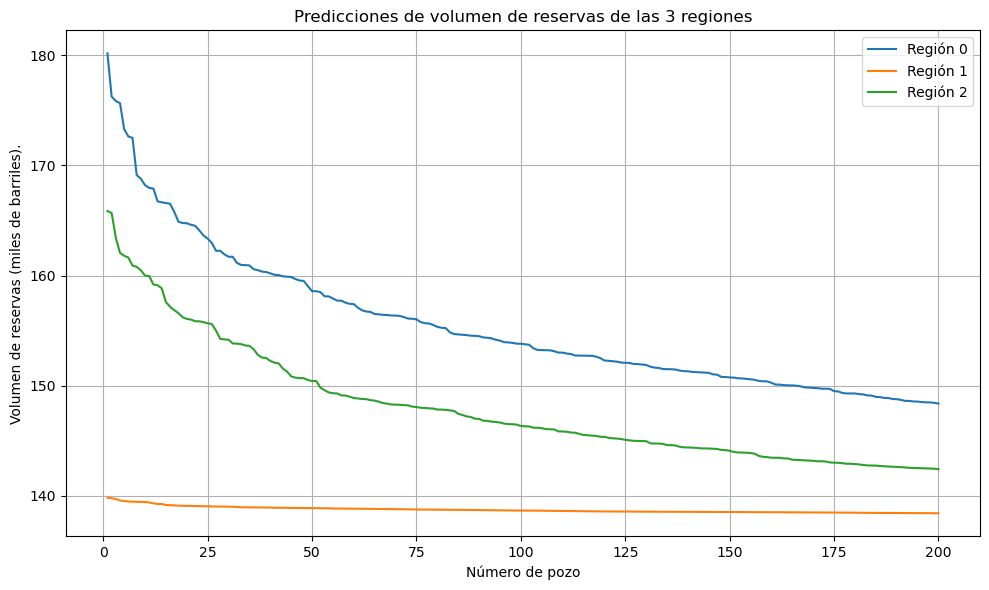

In [138]:
predictions_0 = top_region_0.loc[:, "predictions"]
predictions_1 = top_region_1.loc[:, "predictions"]
predictions_2 = top_region_2.loc[:, "predictions"]

# Números del 1 al 200 para representar los 200 pozos con mayor cantidad de volumen de reservas
pozos = np.arange(1, 201)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Plotear las predicciones 
plt.plot(pozos, predictions_0, label='Región 0')
plt.plot(pozos, predictions_1, label='Región 1')
plt.plot(pozos, predictions_2, label='Región 2')

# Agregar título y etiquetas
plt.title('Predicciones de volumen de reservas de las 3 regiones')
plt.xlabel('Número de pozo')
plt.ylabel('Volumen de reservas (miles de barriles).')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


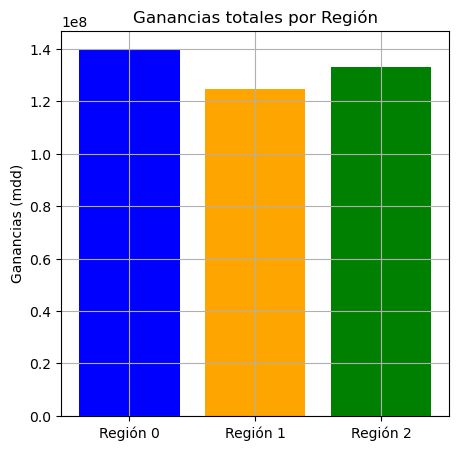

In [139]:
total_revenue_0 = top_region_0.loc[:,'revenue'].sum()
total_revenue_1 = top_region_1.loc[:,'revenue'].sum()
total_revenue_2 = top_region_2.loc[:,'revenue'].sum()

#graficar las ganancias
regiones = ['Región 0', 'Región 1', 'Región 2']
ganancias = [total_revenue_0, total_revenue_1, total_revenue_2]
    
plt.figure(figsize=(5, 5))
plt.bar(regiones, ganancias, color=['blue', 'orange', 'green'])
    
plt.title('Ganancias totales por Región')
plt.ylabel('Ganancias (mdd)')
plt.grid(True)
    
plt.show()

## Bootstraping

1. Estimación de la distribución de beneficios mediante bootstrapping:
Primero, generaremos múltiples muestras bootstrap a partir de nuestro conjunto de datos original y calcularemos los beneficios en cada una de estas muestras.

2. Cálculo del beneficio promedio:
Calcularemos el promedio de los beneficios obtenidos a partir de las muestras bootstrap.

3. Cálculo del intervalo de confianza del 95%:
Utilizaremos los percentiles 2.5 y 97.5 de la distribución de beneficios bootstrap para calcular el intervalo de confianza del 95%.


In [140]:
def bootstrapping (df, num_bootstrap_samples=1000):
    # Fijar el estado aleatorio
    state = np.random.RandomState(12345)
    
    # Almacenar los beneficios de las muestras bootstrap
    bootstrap_etiqueta = []

    # Generar muestras bootstrap 
    for i in range(num_bootstrap_samples):
        bootstrap_sample = df.sample(n=500, replace=True, random_state=state)
        # Calcular la ganancia de cada muestra
        bootstrap_beneficio = bootstrap_sample.mean() 
        bootstrap_etiqueta.append(bootstrap_beneficio)

    # Calcular el beneficio promedio
    beneficio_promedio = np.mean(bootstrap_etiqueta)

    # Cálculo del intervalo de confianza del 95%
    lower_bound_ganancia = np.percentile(bootstrap_etiqueta, 2.5)
    upper_bound_ganancia = np.percentile(bootstrap_etiqueta, 97.5)

    # Graficar la distribución de los beneficios
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrap_etiqueta, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(x=beneficio_promedio, color='red', linestyle='--', linewidth=2, label='Beneficio promedio')
    plt.xlabel('Beneficio por volumen de reservas')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de los beneficios')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Resultados
    print("El beneficio promedio (por volumen de reservas) es de: $", beneficio_promedio)
    print("Intervalo de confianza del 95% para la ganancia:", (lower_bound_ganancia, upper_bound_ganancia))


### Región 0

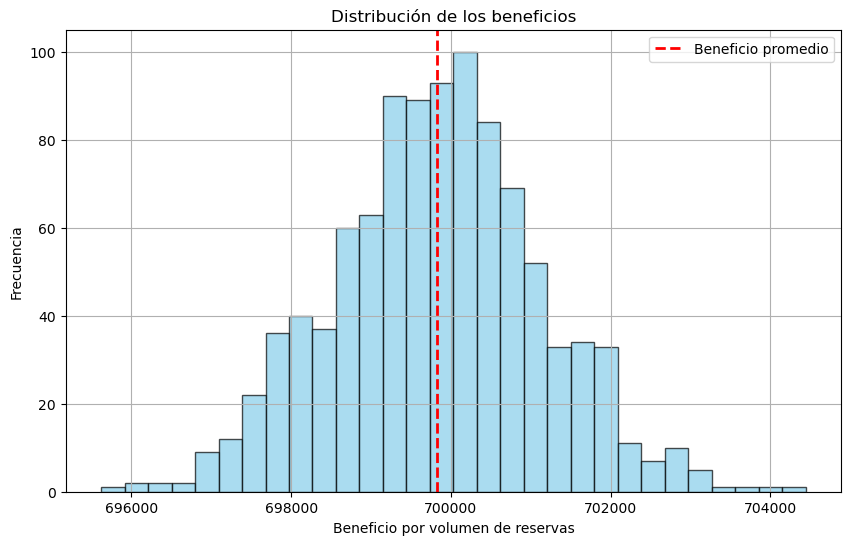

El beneficio promedio (por volumen de reservas) es de: $ 699825.6196374941
Intervalo de confianza del 95% para la ganancia: (697360.170331153, 702393.3584593524)


In [147]:
bootstrapping(top_region_0['revenue'])

### Región 1

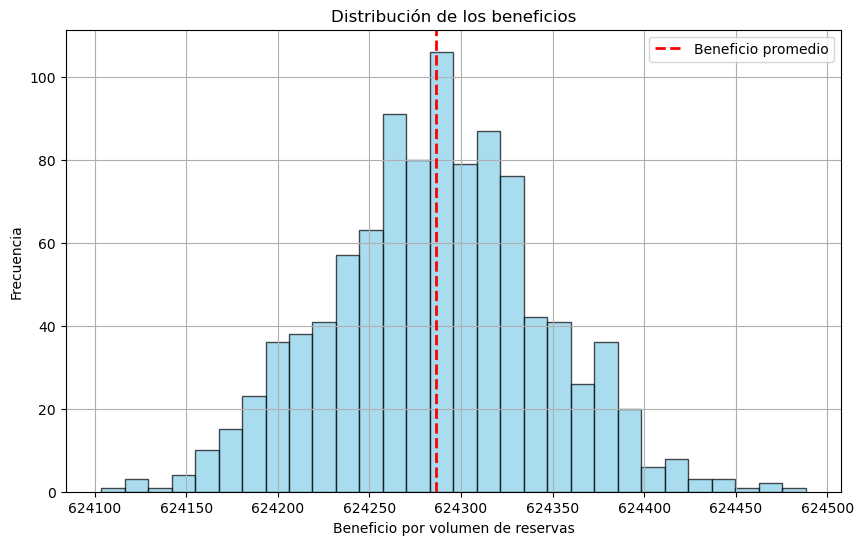

El beneficio promedio (por volumen de reservas) es de: $ 624286.4991352764
Intervalo de confianza del 95% para la ganancia: (624174.7630974276, 624397.9662387765)


In [148]:
bootstrapping(top_region_1['revenue'])

### Región 2

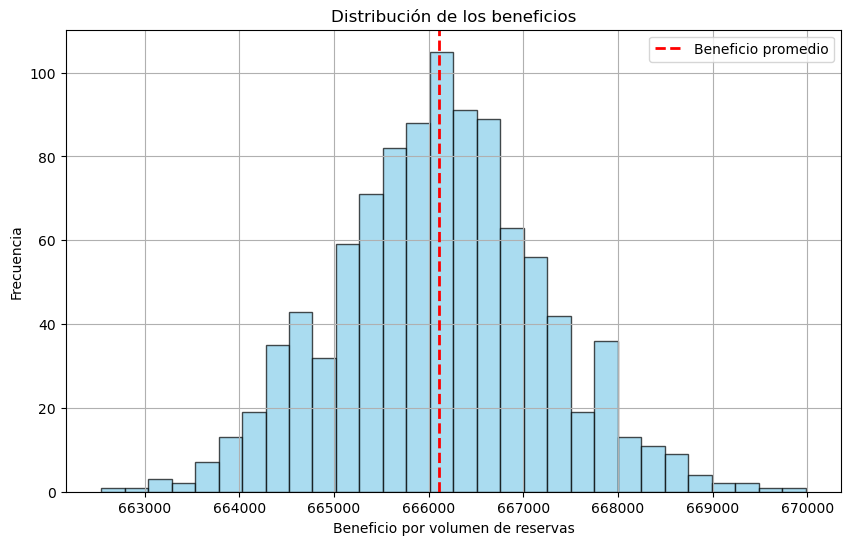

El beneficio promedio (por volumen de reservas) es de: $ 666111.1138568048
Intervalo de confianza del 95% para la ganancia: (664023.9010030756, 668290.2813803762)


In [149]:
bootstrapping(top_region_2['revenue'])

### Conclusión
Para comparar las tres regiones y determinar cuál es la mejor en términos de beneficio por volumen de reservas, podemos considerar varios aspectos:

1. **Beneficio Promedio**: Observando los valores de beneficio promedio, vemos que la Región 0 tiene el beneficio promedio más alto, seguida por la Región 2 y luego la Región 1.

2. **Intervalo de Confianza del 95%**: Si bien el beneficio promedio de la Región 0 es el más alto, también tiene el intervalo de confianza más amplio. Esto indica una mayor incertidumbre en la estimación del verdadero beneficio promedio en comparación con las otras regiones. La Región 1 tiene el intervalo de confianza más estrecho, lo que sugiere una estimación más precisa del beneficio promedio.

Considerando estos aspectos, la Región 0 parece tener el mayor potencial de beneficio, pero también existe una mayor incertidumbre asociada con esta estimación. Por otro lado, la Región 1 tiene una estimación de beneficio promedio más precisa, aunque ligeramente más baja que la Región 0. La Región 2 ocupa un lugar intermedio en términos de beneficio promedio y el ancho del intervalo de confianza.

En conclusión, si se valora una estimación precisa del beneficio promedio, la Región 1 podría considerarse la mejor opción. Sin embargo, si se prefiere un mayor potencial de beneficio a pesar de una mayor incertidumbre, la Región 0 podría ser más adecuada. 

## Conclusión general



Dado que el objetivo de la empresa es recomendar la selección de la región con el mayor margen de beneficio, podemos basar nuestra recomendación en los beneficios promedio calculados para cada región.

Según los resultados proporcionados:

- La Región 0 tiene el beneficio promedio más alto, seguida por la Región 2 y luego la Región 1.

Dado que el beneficio promedio es el indicador principal para esta recomendación, sugeriríamos seleccionar la Región 0 como la opción preferida. Aunque tiene una mayor incertidumbre asociada con la estimación del beneficio promedio debido al intervalo de confianza más amplio, el beneficio promedio más alto indica un mayor potencial de ganancia en comparación con las otras regiones.

Por lo tanto, la recomendación sería seleccionar la Región 0 para invertir en la apertura de los 200 pozos nuevos de petróleo. Sin embargo, es importante tener en cuenta la incertidumbre asociada con esta elección y considerar otros factores relevantes, como los costos operativos, la disponibilidad de recursos y el riesgo empresarial, antes de tomar una decisión final.